In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
df = fetch_california_housing()

In [ ]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
dataset=pd.DataFrame(df.data)

In [ ]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# Independent features and dependent features
X = dataset
Y = df.target

In [ ]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)


In [ ]:
X_train

,0,1,2,3,4,5,6,7
2072,1.4817,6.0,4.443645,1.134293,1397.0,3.350120,36.77,-119.84
10600,6.9133,8.0,5.976471,1.026471,862.0,2.535294,33.68,-117.80
2494,1.5536,25.0,4.088785,1.000000,931.0,4.350467,36.60,-120.19
4284,1.5284,31.0,2.740088,1.008811,597.0,2.629956,34.10,-118.32
16541,4.0815,21.0,5.166667,1.002688,1130.0,3.037634,37.79,-121.23
...,...,...,...,...,...,...,...,...
1099,3.0625,20.0,5.860000,1.112000,745.0,2.980000,39.59,-121.90
18898,2.6133,49.0,5.163755,1.100437,1131.0,2.469432,38.11,-122.25
11798,4.4958,19.0,5.899767,1.074592,1206.0,2.811189,38.92,-121.22
6637,2.5750,39.0,3.591203,1.086675,2546.0,3.293661,34.16,-118.14


In [ ]:
Y_train

array([0.72 , 2.741, 0.583, ..., 1.926, 1.535, 0.811])

In [ ]:
# Standardezing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
regression=LinearRegression()

In [ ]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
mse=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=10) #cross validation trains 10 models so we get 10 different values

In [ ]:
np.mean(mse)# MSE should be as low as possible

np.float64(-0.5282169821538012)

In [ ]:
##prediction
reg_pred=regression.predict(X_test)

In [ ]:
reg_pred

array([2.80991017, 1.25276895, 1.44720173, ..., 1.57213375, 1.43077765,
       2.60233972])

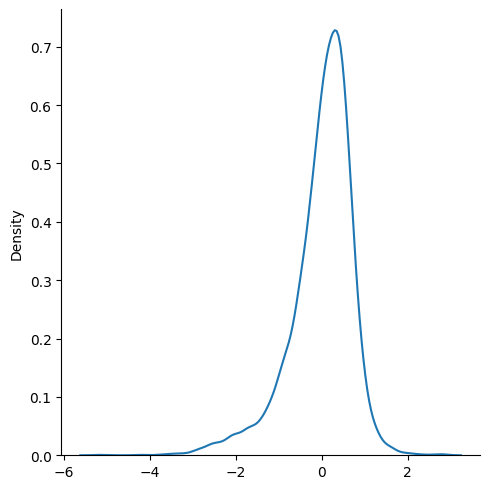

In [ ]:
import seaborn as sns
sns.displot(reg_pred-Y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(reg_pred,Y_test)

In [ ]:
score

0.3397479704506361